<a href="https://colab.research.google.com/github/pranjalpandey22/Natural-Language-Processing/blob/main/Pfizer%20Twitter%20Analysis/pfizer_twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pfizer Vaccine Tweets Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the packages

In [58]:
# Import the packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import vader 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pfizer Vaccine Tweets/vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5715 non-null   int64 
 1   user_name         5715 non-null   object
 2   user_location     4528 non-null   object
 3   user_description  5353 non-null   object
 4   user_created      5715 non-null   object
 5   user_followers    5715 non-null   int64 
 6   user_friends      5715 non-null   int64 
 7   user_favourites   5715 non-null   int64 
 8   user_verified     5715 non-null   bool  
 9   date              5715 non-null   object
 10  text              5715 non-null   object
 11  hashtags          4273 non-null   object
 12  source            5714 non-null   object
 13  retweets          5715 non-null   int64 
 14  favorites         5715 non-null   int64 
 15  is_retweet        5715 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 636.4+ KB


In [7]:
print("Data is from")
print(df.date.min())
print("till")
print(df.date.max())

Data is from
2020-12-12 11:55:28
till
2021-02-18 06:44:21


### How are people tweeting?

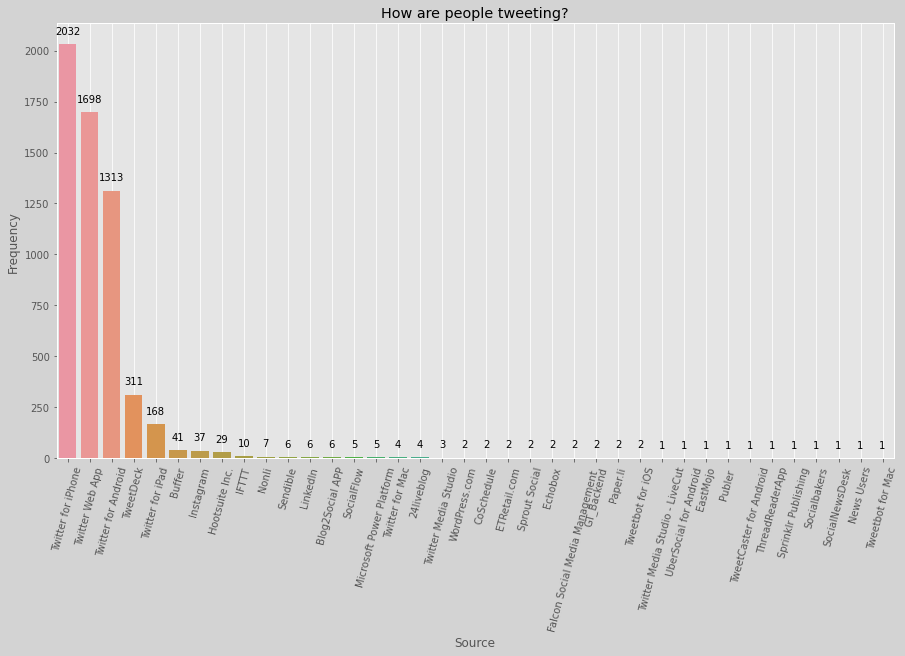

In [8]:
source_counts = df.groupby('source').count()[['id']].sort_values('id', ascending=False)
ax = plt.figure(figsize=(15, 8), facecolor='lightgrey')

source_counts_plot = sns.barplot(data=source_counts, x=source_counts.index, y='id')
plt.xticks(rotation=75)

for p in source_counts_plot.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 50
  value = '{:.0f}'.format(p.get_height())
  source_counts_plot.text(_x, _y, value, ha="center") 

plt.grid()
plt.title("How are people tweeting?")
plt.xlabel("Source")
plt.ylabel("Frequency")
plt.show()

In [9]:
all_tweets = list(df.text)
stopwords_eng = nltk.corpus.stopwords.words('english')

all_words_raw = [word for tweet in all_tweets for word in tweet.split(' ')]
all_words = [word for word in all_words_raw if not word in stopwords_eng]

### Tweets about the 'Vaccine'

In [10]:
# Finding context around the term 'vaccine'
print("Context around the word 'vaccine' - ")
all_tweets_text = nltk.text.Text(all_words)
all_tweets_text.concordance("vaccine", width=150)

Context around the word 'vaccine' - 
Displaying 25 of 1458 matches:
                                                                       vaccine created last 2-4 years… https://t.co/ieYlCKBr8P Facts immutable, Senat
acknowledge them. (1) You born i… https://t.co/jqgV18kch4 Explain need vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… 
tps://t.co/KxbSRoBEHq Does anyone useful advice/guidance whether COVID vaccine safe whilst breastfeeding?… https://t.co/EifsyQoeKN bit sad claim fame
NTech… https://t.co/ow0Pglkwte "Expect 145 sites across states receive vaccine Monday, another 425 sites Tuesday," said offic… https://t.co/HiUVYJzOB
 lowe… https://t.co/eC94w3TUl0 The trump administration failed deliver vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.c
… https://t.co/6379SZjNQi #FDA authorizes #PfizerBioNTech #coronavirus vaccine emergency use
https://t.co/VZ6bDPbbPG When The #CovidVaccine 
Poisons 
 #vaccination #vaccine… https://

### Most common words

Total words:  70019
Top 30 most common words -  [('#PfizerBioNTech', 2221), ('vaccine', 1274), ('', 826), ('I', 763), ('dose', 575), ('#COVID19', 522), ('first', 515), ('#vaccine', 401), ('The', 398), ('#CovidVaccine', 333), ('&amp;', 253), ('Pfizer', 253), ('get', 248), ('COVID-19', 246), ('-', 222), ('people', 216), ('#Pfizer', 208), ('second', 205), ('received', 199), ('got', 193), ('doses', 189), ('vaccines', 188), ('Vaccine', 175), ('2nd', 172), ('#PfizerBiontech', 165), ('#Moderna', 146), ('1st', 141), ('vaccination', 140), ('vaccine.', 139), ('A', 138)]


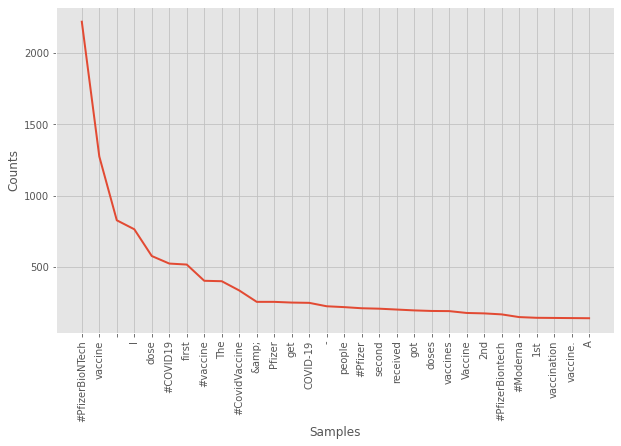

In [11]:
# Most common words by FreqDist
fdist = nltk.FreqDist(all_words)
print("Total words: ", len(all_words))
most_common = fdist.most_common(30)
print("Top 30 most common words - ", most_common)
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.show()

In [12]:
# Tweets contining these words have been retweeted the most
tweet_tokenizer = TweetTokenizer()

## tokenize the tweets
tokenized_tweets = list(df.text.apply(lambda x: tweet_tokenizer.tokenize(x)))

## remove the stopwords and punctuations
stopwords_eng = nltk.corpus.stopwords.words('english')
punctuation = list(string.punctuation)
stop_words = stopwords_eng + punctuation
cleaned_words = [word for tweet in tokenized_tweets for word in tweet if not word in stop_words]

## retweet count dictionary
def retweet_counter(df):
  """
  This function takes in a dataframe
  Returns a dictionary of word:retweets
  """
  word_retweet_count = dict.fromkeys(cleaned_words, 0)
  for row in df.values:
    for word in word_retweet_count.keys():
      if word in row[0]:
        word_retweet_count[word] =+ row[1]
  return word_retweet_count

word_retweet_count = retweet_counter(df[['text', 'retweets']])

In [13]:
word_by_retweets = sorted(word_retweet_count.items(), key=lambda x: x[1], reverse=True)
word_by_retweets[:30]

[('https://t.co/bxezEVXQX8', 678),
 ('immutable', 446),
 ('sturdy', 446),
 ('https://t.co/jqgV18kch4', 446),
 ('@WHOWPRO', 389),
 ('https://t.co/5pmySV4gcN', 389),
 ('⭐', 324),
 ('https://t.co/puaGKI3GqB', 324),
 ('https://t.co/40UMur6yoO', 284),
 ('https://t.co/3b7OwsX9mb', 230),
 ('Castle', 199),
 ('Household', 199),
 ('Windsor', 199),
 ('Palace', 199),
 ('https://t.co/a26ZseSDcj', 199),
 ('https://t.co/rp1SjhkBow', 176),
 ('vaccine.Its', 115),
 ('https://t.co/e1Pgts9nzB', 115),
 ('persons', 112),
 ('sons', 112),
 ('Display', 112),
 ('https://t.co/K5ZOPwyoJg', 112),
 ('#PotassiumChloride', 104),
 ('#LethalInjection', 104),
 ('https://t.co/ZGQy7xdyQo', 104),
 ('@werthers_orig', 85),
 ('https://t.co/O83UEjDLl2', 85),
 ('https://t.co/Nya3cQTA3j', 80),
 ('multiple', 64),
 ('agencies', 64)]

This particular link has the highest number of retweets!

In [14]:
%%html
<iframe src="https://drive.google.com/file/d/19mQ1a6mxqsCTeu3SEAvzlMwOn3puE_Cf/preview" width="350" height="350"></iframe>
</br>
<p>Later, we will also see how the general sentiment is regarding the vaccine</p>

In [15]:
print("Words in bigrams occurring together more frequently than others - \nCollocations - ")
all_tweets_text.collocations(num=50)

Words in bigrams occurring together more frequently than others - 
Collocations - 
first dose; Red Crescent; side effects; second dose; Crescent
announced; announced ban; #PfizerBioNTech vaccine; 2nd dose; import
150,000; FDA! View article; dose #PfizerBioNTech; received first; ban
import; approved emegency; emegency use; use FDA! View; COVID-19
vaccine; 1st dose; Pfizer/BioNTech Coronavirus; Purchase 300-million;
emergency use; #PfizerBioNTech #vaccine; https://t.co/E6CxrV4yHA
#covidvaccines; #covidvaccines #Pfizer…; #EU Plans; know more!…;
article know; .@antonioguterres  #Iran; Vaccines
https://t.co/E6CxrV4yHA; #PfizerBioNTech #CovidVaccine;  #Iran
Khamenei’s; death toll; Death Toll; Toll Exceeds199,300
.@Maryam_Rajavi:Khamenei’s; got first; #Iran:#Coronavirus Death; year
old; COVID vaccine; @10DowningStreet @Conservatives; Coronavirus
vaccine; allergic reaction; Khamenei’s ban; u-turn occur; #Covid19
Vaccines; 52% effective,; @Conservatives inevitable; Covid-19 vaccine;
single dose

### Location Analysis

In [16]:
locations = pd.DataFrame(df.groupby('user_location').count()).reset_index()[['user_location', 'id']].sort_values('id', ascending=False)
locations.columns = ['location', 'count']
top100_locations = locations.iloc[:100]
top100_locations

,location,count
821,"London, England",81
656,India,71
284,Canada,66
1509,United Kingdom,56
808,London,55
...,...,...
16,.fi .fr .se .uk .de,8
674,Israel,8
444,"Durham, NC",8
552,"Glasgow, Scotland",8


In [17]:
geocoder = Nominatim(user_agent='geocode_location')
geocode = RateLimiter(geocoder.geocode, min_delay_seconds=0.1, return_value_on_exception=None)

In [18]:
func = lambda loc: None if pd.isnull(loc) else (geocode(loc)[0].split(', ')[-1] if geocode(loc) else None)
countries = top100_locations['location'].apply(func)
countries

821     United Kingdom
656              India
284             Canada
1509    United Kingdom
808     United Kingdom
             ...      
16                None
674              ישראל
444      United States
552     United Kingdom
492             Canada
Name: location, Length: 100, dtype: object

In [19]:
print("Top 100 user locations are from {0} countries".format(len(countries.unique())-1)) # excluding None

Top 100 user locations are from 26 countries


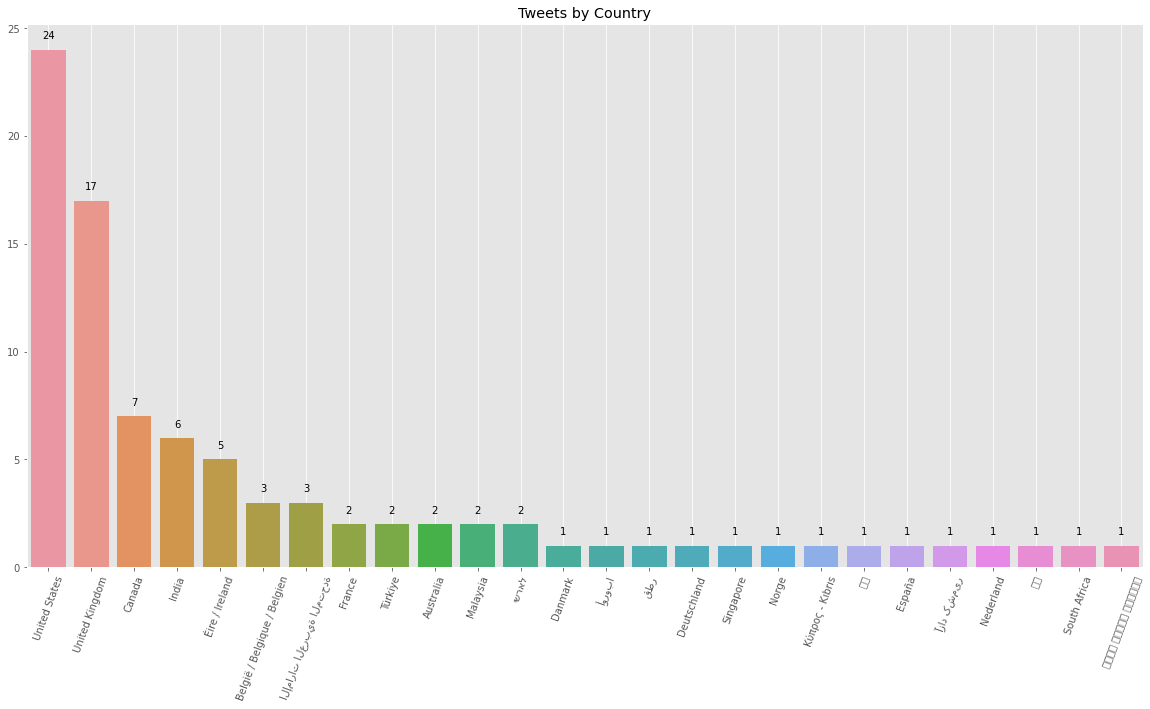

Index(['United States', 'United Kingdom', 'Canada', 'India', 'Éire / Ireland',
       'België / Belgique / Belgien', 'الإمارات العربية المتحدة', 'France',
       'Türkiye', 'Australia', 'Malaysia', 'ישראל', 'Danmark', 'أوروبا', 'قطر',
       'Deutschland', 'Singapore', 'Norge', 'Κύπρος - Kıbrıs', '中国', 'España',
       'آزاد کشمیر', 'Nederland', '日本', 'South Africa', 'ශ්‍රී ලංකාව இலங்கை'],
      dtype='object')


In [20]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=countries.value_counts().index, y=countries.value_counts().values)
plt.xticks(rotation=70)
plt.title("Tweets by Country")
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 0.5
  value = '{:.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center")
plt.grid()
plt.show()
print((countries.value_counts().index))

### Influence of verified users

In [21]:
# Influence of verified users
verified_users_flag = pd.Series(["Yes" if df['user_verified'].iloc[num]==True else "No" for num in range(len(df))])
verified_users_flag

0        No
1        No
2        No
3       Yes
4        No
       ... 
5710     No
5711     No
5712    Yes
5713     No
5714     No
Length: 5715, dtype: object

#### Difference in how they tweet

In [22]:
source_comparision = pd.concat([verified_users_flag, df.source], axis=1)
source_comparision.columns = ['verified?', 'source']
source_comparision

,verified?,source
0,No,Twitter for Android
1,No,Twitter Web App
2,No,Twitter for Android
3,Yes,Twitter Web App
4,No,Twitter for iPhone
...,...,...
5710,No,Twitter for iPhone
5711,No,Twitter for Android
5712,Yes,Twitter Web App
5713,No,TweetDeck


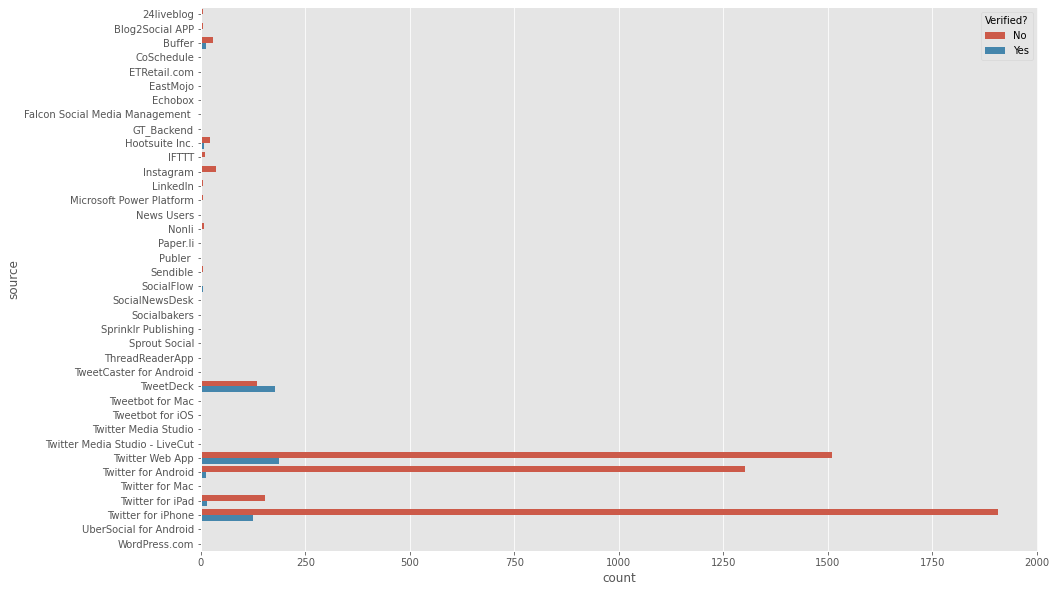

In [23]:
com = source_comparision.groupby('source')['verified?'].value_counts()
com_df = pd.DataFrame(com)
com_df.columns=['count']
com_df = com_df.reset_index()

plt.figure(figsize=(15, 10))
ax2 = sns.barplot(data=com_df, x=com_df['count'], y=com_df['source'], hue=com_df['verified?'])
plt.legend(title="Verified?", loc='upper right')
plt.show()

#### From where are they tweeting?

In [24]:
location_comparision = pd.concat([verified_users_flag, df.user_location], axis=1)
location_comparision.columns = ['verified?', 'location']
location_comparision

,verified?,location
0,No,"La Crescenta-Montrose, CA"
1,No,"San Francisco, CA"
2,No,Your Bed
3,Yes,"Vancouver, BC - Canada"
4,No,NaN
...,...,...
5710,No,"Miami, FL"
5711,No,Land of Entrapment
5712,Yes,"Vancouver, BC - Canada"
5713,No,"Weinheim, Germany"


Someone is tweeting from my bed...?

#### Popularity

In [25]:
popularity = pd.concat([verified_users_flag, df.retweets, df.favorites], axis=1)
popularity.columns = ['verified?', 'retweets', 'favorites']
popularity

,verified?,retweets,favorites
0,No,0,0
1,No,1,1
2,No,0,0
3,Yes,446,2129
4,No,0,0
...,...,...,...
5710,No,0,0
5711,No,0,0
5712,Yes,1,8
5713,No,0,0


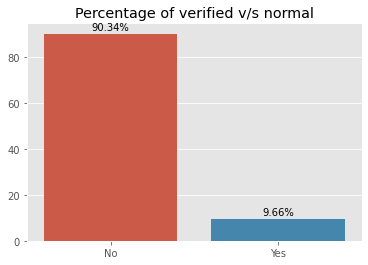

In [26]:
pop_per = (popularity['verified?'].value_counts()/len(popularity)*100).values
pop_per = [round(percent, 2) for percent in pop_per]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=['No', 'Yes'], y=pop_per)
plt.title("Percentage of verified v/s normal")
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 1.5
  value = '{:.2f}%'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

plt.show()

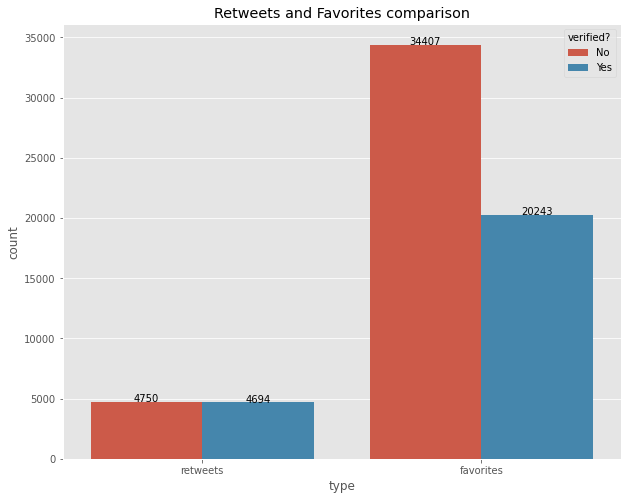

In [27]:
# Plotting retweets and favorites to see influentce of verfied users 

popularity_by_verification = popularity.groupby('verified?').sum().reset_index()
new_pop = pd.melt(popularity_by_verification, id_vars=['verified?'], var_name='type', value_name='count')
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=new_pop, x='type', y='count', hue='verified?')
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.0f}'.format(p.get_height())
  ax.text(_x, _y, value, ha="center") 

plt.title('Retweets and Favorites comparison')
plt.show()


Insights - 

*   Even though verified users form a mere ~10% of the user base, the engagemnet generated by them is comparable to the remaining 90% - specially in terms of retweets.
*   Why retweets are comparable and favorites not so much? - That is Twitter Psychology and social media strategy at play!
*   In terms of Twitter Psychology, favorites provide many ways for the followers to engage - they can save the tweet for later, or maybe they share the same sentiment and identify with the tweet and this is a way to show their support. (There are several shades of favorites gaining popularity like hate favorite weirdly enough) - [More](https://slate.com/technology/2014/06/twitter-favorite-button-researchers-find-25-distinct-reasons-for-its-use.html)
*   In terms of social media strategy, retweets matter more as they allow the original tweeter as well as the re-tweeter more visibility and coverage - hence more popularity and potentially more followers.

In [28]:
retweets = df[df['retweets']>0].sort_values(by='retweets', ascending=False)
retweets.head(20)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
3440,1350535798366547969,The Epoch Times,"New York, USA","An independent, award-winning voice in print &...",2009-04-05 23:54:55,403105,80,29047,True,2021-01-16 20:10:00,55 people in the US have died after receiving ...,"['Vaccine', 'COVID19']",Buffer,678,654,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4213,1352443555957010438,KKMalaysia🇲🇾,Putrajaya,"The Official twitter for Ministry Of Health, M...",2012-03-20 05:59:03,1144487,97,2146,True,2021-01-22 02:30:45,What do you need to know about #PfizerBioNTech...,"['PfizerBioNTech', 'COVID19', 'CovidVaccine']",Twitter for Android,389,472,False
5364,1358911980267057161,"Ruth Ann Crystal, MD","Silicon Valley, California","Ob/Gyn Doctor, Innovator, Teacher, Filmmaker, ...",2009-07-29 05:03:25,12266,4788,64869,False,2021-02-08 22:53:58,Please Retweet!\n\n⭐️Comparison of the 6 top C...,NaN,Twitter Web App,324,450,False
183,1338287664454393858,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,8410,2228,10393,True,2020-12-14 01:00:18,Welcoming the 1st #COVID19vaccines to 🇨🇦 tonig...,"['COVID19vaccines', 'PfizerBioNTech']",Twitter for iPhone,284,1979,False
3004,1348068786587500547,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,9381,2259,10658,True,2021-01-10 00:46:59,🇨🇦 has received &amp; distributed over half a ...,"['PfizerBioNTech', 'Moderna']",Twitter for iPhone,230,790,False
2826,1347921247083122689,Chris Ship,"London, England",ITV NEWS Royal Editor. Tweeting the newsworthy...,2009-12-09 20:08:47,73534,1528,2108,True,2021-01-09 15:00:43,A Palace source said the vaccines were adminis...,NaN,Twitter for iPhone,199,1422,False
922,1340456887817560065,The Epoch Times,"New York, USA","An independent, award-winning voice in print &...",2009-04-05 23:54:55,455202,90,28251,True,2020-12-20 00:40:01,The @US_FDA is investigating around 5 allergic...,NaN,Buffer,176,288,False
793,1340304234416381954,Senator Shehu Sani,Nigeria,Human Rights Activist | Author | PanAfricanist...,2010-02-24 10:39:37,1772291,2153,5272,True,2020-12-19 14:33:25,The Western media deliberately down played or ...,"['coronavirus', 'Pfizer']",Twitter for iPhone,115,750,False
3867,1351092932812660741,Monica Chopra Jagtap,"Mumbai, India",A Congresswoman ...A Doctor..An Advocate...Vic...,2010-09-29 16:13:53,2168,453,22401,False,2021-01-18 09:03:51,Display board in Ireland says it all. It’s a m...,NaN,Twitter for iPhone,112,118,False


### When are people tweeting?

In [29]:
datetime = df[['id', 'date']]
datetime.columns = ['id', 'datetime']
datetime['date'] = datetime['datetime'].apply(lambda datetime: datetime[:10])
dates = datetime.groupby('date').count()['id'].reset_index().sort_values('date', ascending=True)
dates.head()

,date,id
0,2020-12-12,63
1,2020-12-13,98
2,2020-12-14,137
3,2020-12-15,150
4,2020-12-16,144


In [30]:
dates.max()['id']

210

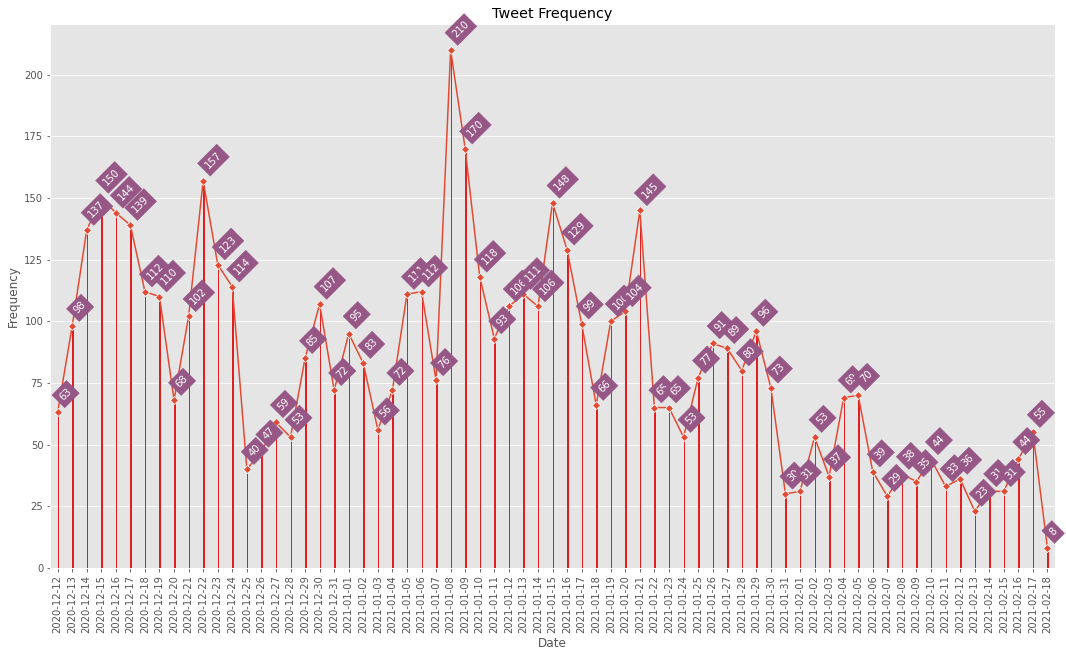

In [31]:
plt.figure(figsize=(18, 10))
ax = sns.lineplot(x='date', y='id', data=dates, marker="D")
ax2 = sns.barplot(x='date', y='id', data=dates, color='red')
plt.title('Tweet Frequency')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Date')

# labelling the points
for x, y in zip(dates['date'], dates['id']):
  plt.text(x = x, y = y+5, s = "{:.0f}".format(y), color = 'white', rotation=45).set_backgroundcolor('#965786')

for bar in ax2.patches:
  bar.set_x(bar.get_x() + 0.4)
  bar.set_width(0.1)
   
plt.show()

In [32]:
tweets_08_09 = list(df[(df['date'].str.contains('2021-01-08') | df['date'].str.contains('2021-01-09'))]['text'])
tweets_08_09[:5]

['Got my COVID 19 vaccine! Cheers to scientists who faced rejections yet believed in a very novel concept of the mRNA… https://t.co/mklAgO3nHu',
 'Had my second #PfizerBioNTech  vaccine today thanks to my lovely GP surgery colleagues ✅💉',
 '2 November 2019 , #crook #PfizerBioNTech had already ordered 800 M glass for #vaccines. Nuremberg trial is on the w… https://t.co/4pSJTcfmD0',
 'Thank you @plymouthcc and @UHP_NHS for offering Children’s Social Care staff a #PfizerBioNTech vaccination this wee… https://t.co/itPAlEEOf3',
 'A truly emotional moment.\n\nIt looks so simple. One little jab.\n\nBut my heart is full of gratitude for the scientist… https://t.co/tLN3VM3kb9']

There are 50212 words in the combination of all review.


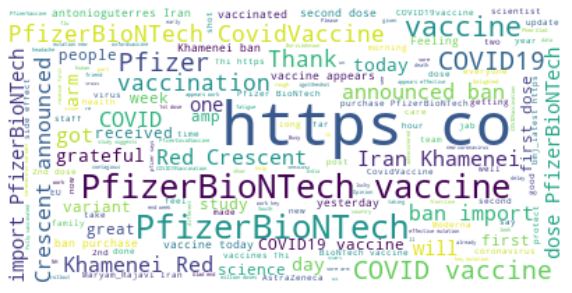

In [33]:
tweets_08_09_text = " ".join(tweets_08_09)
print ("There are {} words in the combination of all review.".format(len(tweets_08_09_text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(tweets_08_09_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# Most common words by FreqDist
fdist_08_09 = nltk.FreqDist([word for word in tweets_08_09_text.split(" ")])
most_common_08_09 = fdist_08_09.most_common(30)
print("Top 30 most common words on 08-01-2021- ")
most_common_08_09

Top 30 most common words on 08-01-2021- 


[('the', 257),
 ('#PfizerBioNTech', 184),
 ('to', 142),
 ('of', 140),
 ('and', 87),
 ('a', 85),
 ('vaccine', 83),
 ('my', 72),
 ('in', 69),
 ('for', 59),
 ('is', 57),
 ('on', 52),
 ('I', 52),
 ('dose', 51),
 ('', 46),
 ('ban', 36),
 ('be', 35),
 ('you', 33),
 ('#COVID19', 31),
 ('have', 28),
 ('had', 25),
 ('this', 25),
 ('against', 25),
 ('first', 25),
 ('with', 25),
 ('Red', 24),
 ('Crescent', 24),
 ('announced', 24),
 ('import', 24),
 ('150,000', 22)]

## Analyzing Sentiments

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.

### Without Data Preprocessing

In [38]:
## VADER Sentiment Analyzer
analyser = vader.SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(tweet):
  score = analyser.polarity_scores(tweet) 
  return analyser.polarity_scores(tweet)

df['sentiment_scores'] = df['text'].apply(sentiment_analyzer_scores)
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment_scores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co..."
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp..."
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp..."
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,"{'neg': 0.112, 'neu': 0.65, 'pos': 0.238, 'com..."
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,"{'neg': 0.057, 'neu': 0.598, 'pos': 0.345, 'co..."
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [39]:
df.text.iloc[0], df.sentiment_scores.iloc[0]

('Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
 {'compound': 0.4019, 'neg': 0.0, 'neu': 0.787, 'pos': 0.213})

In [40]:
df.sentiment_scores.iloc[0].keys(), df.sentiment_scores.iloc[0].values()

(dict_keys(['neg', 'neu', 'pos', 'compound']),
 dict_values([0.0, 0.787, 0.213, 0.4019]))

In [41]:
df['sentiment_scores_pos'] = df['sentiment_scores'].apply(lambda score: score['pos'])
df['sentiment_scores_neu'] = df['sentiment_scores'].apply(lambda score: score['neu'])
df['sentiment_scores_neg'] = df['sentiment_scores'].apply(lambda score: score['neg'])

df['sentiment'] = df['sentiment_scores'].apply(lambda score: list(score.keys())[list(score.values()).index(max(score['pos'], score['neu'], score['neg']))])

In [42]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment_scores,sentiment_scores_pos,sentiment_scores_neu,sentiment_scores_neg,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.213,0.787,0.000,neu
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",0.109,0.766,0.125,neu
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.125,0.875,0.000,neu
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu


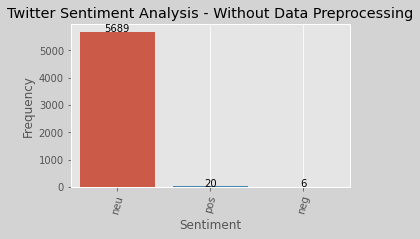

In [43]:
sentiments = df.groupby('sentiment').count()[['id']].sort_values('id', ascending=False)
ax = plt.figure(figsize=(5, 3), facecolor='lightgrey')

sentiments_plot = sns.barplot(data=sentiments, x=sentiments.index, y='id')
plt.xticks(rotation=75)

for p in sentiments_plot.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 1
  value = '{:.0f}'.format(p.get_height())
  sentiments_plot.text(_x, _y, value, ha="center") 

plt.grid()
plt.title("Twitter Sentiment Analysis - Without Data Preprocessing")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

### With Data Preprocessing

In [44]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'sentiment_scores', 'sentiment_scores_pos',
       'sentiment_scores_neu', 'sentiment_scores_neg', 'sentiment'],
      dtype='object')

In [73]:
## lower tweet
def lower_tweet(tweet):
  return tweet.lower()

## convert emojis
def convert_emojis(tweet):
  demojized_tweet = emoji.demojize(tweet)
  return demojized_tweet

## remove emojis
def remove_emojis(tweet):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
  return re.sub(emoj, '', tweet)

## tokenize tweet
def tweet_tokenize(tweet):
  tokenized_tweet = tweet_tokenizer.tokenize(tweet)
  return tokenized_tweet

## remove stopwords
def remove_stopwords(tweet):
  english_stopwords = stopwords.words('english')
  cleaned_tweet = [word for word in tweet if not word in english_stopwords]
  return cleaned_tweet

## lemmatize tweet
def lemmatize_tweet(tweet):
  wordnet_lemmatizer = WordNetLemmatizer()
  lemmas = [wordnet_lemmatizer.lemmatize(word) for word in tweet]
  return ' '.join(lemmas)

In [71]:
print(remove_stopwords(tweet_tokenize(lower_tweet(df.text.iloc[0]))))
data_preprocessing_pipeline.transform(df.text.iloc[0])

['folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', '#pfizerbiontech', 'https://t.co/xehhimg1kf']


'folk said daikon paste could treat cytokine storm #pfizerbiontech https://t.co/xehhimg1kf'

In [72]:
# Data Preprocessing Pipeline
data_preprocessing_pipeline = Pipeline(steps=[
                                      ('lower_tweet', FunctionTransformer(lower_tweet)), 
                                      ('tweet_tokenize', FunctionTransformer(tweet_tokenize)), 
                                      ('remove_stopwords', FunctionTransformer(remove_stopwords)), 
                                      ('lemmatize_tweet', FunctionTransformer(lemmatize_tweet))])

In [74]:
df['preprocessed_tweets'] = df.text.apply(lambda tweet: data_preprocessing_pipeline.transform(tweet))

In [75]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment_scores,sentiment_scores_pos,sentiment_scores_neu,sentiment_scores_neg,sentiment,preprocessed_tweets
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.213,0.787,0.000,neu,folk said daikon paste could treat cytokine st...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",0.109,0.766,0.125,neu,"world wrong side history year , hopefully , bi..."
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.125,0.875,0.000,neu,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu,"fact immutable , senator , even ethically stur..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu,explain need vaccine @borisjohnson @matthancoc...


In [76]:
## VADER Sentiment Analyzer
analyser = vader.SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(tweet):
  score = analyser.polarity_scores(tweet) 
  return analyser.polarity_scores(tweet)

df['new_sentiment_scores'] = df['preprocessed_tweets'].apply(sentiment_analyzer_scores)
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment_scores,sentiment_scores_pos,sentiment_scores_neu,sentiment_scores_neg,sentiment,preprocessed_tweets,new_sentiment_scores
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.213,0.787,0.000,neu,folk said daikon paste could treat cytokine st...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",0.109,0.766,0.125,neu,"world wrong side history year , hopefully , bi...","{'neg': 0.196, 'neu': 0.633, 'pos': 0.171, 'co..."
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.125,0.875,0.000,neu,#coronavirus #sputnikv #astrazeneca #pfizerbio...,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp..."
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu,"fact immutable , senator , even ethically stur...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,neu,explain need vaccine @borisjohnson @matthancoc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",0.293,0.707,0.000,neu,anyone useful advice / guidance whether covid ...,"{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'comp..."
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,"{'neg': 0.112, 'neu': 0.65, 'pos': 0.238, 'com...",0.238,0.650,0.112,neu,bit sad claim fame success #vaccination patrio...,"{'neg': 0.166, 'neu': 0.481, 'pos': 0.353, 'co..."
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,"{'neg': 0.057, 'neu': 0.598, 'pos': 0.345, 'co...",0.345,0.598,0.057,neu,many bright day 2020 best 1 . #bidenharris win...,"{'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'comp..."
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVa

In [77]:
df['new_sentiment_scores_pos'] = df['new_sentiment_scores'].apply(lambda score: score['pos'])
df['new_sentiment_scores_neu'] = df['new_sentiment_scores'].apply(lambda score: score['neu'])
df['new_sentiment_scores_neg'] = df['new_sentiment_scores'].apply(lambda score: score['neg'])

df['new_sentiment'] = df['new_sentiment_scores'].apply(lambda score: list(score.keys())[list(score.values()).index(max(score['pos'], score['neu'], score['neg']))])

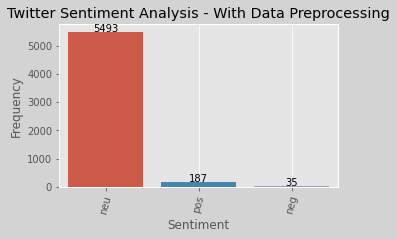

In [79]:
sentiments = df.groupby('new_sentiment').count()[['id']].sort_values('id', ascending=False)
ax = plt.figure(figsize=(5, 3), facecolor='lightgrey')

sentiments_plot = sns.barplot(data=sentiments, x=sentiments.index, y='id')
plt.xticks(rotation=75)

for p in sentiments_plot.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 1
  value = '{:.0f}'.format(p.get_height())
  sentiments_plot.text(_x, _y, value, ha="center") 

plt.grid()
plt.title("Twitter Sentiment Analysis - With Data Preprocessing")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

## VADER CITATION

VADER CITATION </br>
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# Installing Packages

In [64]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1]:
!pip install emot
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Pfizer Vaccine Tweets/pfizer_twitter_analysis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Pfizer Vaccine Tweets/pfizer_twitter_analysis.ipynb to pdf
[NbConvertApp] Support files will be in pfizer_twitter_analysis_files/
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Making directory ./pfizer_twitter_analysis_files
[NbConvertApp] Writing 126409 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./no